In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import plotly.express as px


In [2]:
data = pd.read_csv("new_retail_data.csv")

In [3]:
data.head(2)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,21.0,Male,Low,Regular,9/18/2023,2023.0,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,19.0,Female,Low,Premium,12/31/2023,2023.0,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab


In [4]:
data.describe()

,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,3.016770e+05,301702.000000,3.016480e+05,301670.000000,301837.000000,301660.000000,301649.000000,301653.000000,301660.000000,301826.000000
mean,5.495823e+06,55006.553934,5.501464e+09,50298.951019,35.481326,2023.165113,5.359729,255.163659,1367.651156,3.162670
std,2.595565e+06,26005.675200,2.596017e+09,28972.807134,15.021933,0.371283,2.868575,141.389640,1128.998515,1.320827
min,1.000007e+06,10000.000000,1.000049e+09,501.000000,18.000000,2023.000000,1.000000,10.000219,10.003750,1.000000
25%,3.247930e+06,32469.250000,3.255061e+09,25425.000000,22.000000,2023.000000,3.000000,132.890764,438.724278,2.000000
50%,5.499657e+06,55012.000000,5.505812e+09,50602.500000,32.000000,2023.000000,5.000000,255.470969,1041.117547,3.000000
75%,7.739509e+06,77511.000000,7.749860e+09,75252.000000,46.000000,2023.000000,8.000000,377.672606,2029.999853,4.000000
max,9.999995e+06,99999.000000,9.999996e+09,99949.000000,70.000000,2024.000000,10.000000,499.997911,4999.625796,5.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [6]:
data.isnull().sum()

Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64

In [7]:
for col in ['Transaction_ID', 'Customer_ID', 'Phone','Zipcode' ,'Age','Year' ,'Ratings']:
    if data[col].isna().any():
        # Calculating the mean of the column (ignoring NaN values)
        col_mean = data[col].mean(skipna=True)

        # Filling NaN values with the mean
        data[col].fillna(col_mean, inplace=True)

    # Converting the column to integer dtype
    data[col] = data[col].astype(int)

print(data.isnull().sum())


Transaction_ID        0
Customer_ID           0
Name                382
Email               347
Phone                 0
Address             315
City                248
State               281
Zipcode               0
Country             271
Age                   0
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                  0
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings               0
products              0
dtype: int64


In [8]:
data['Date'] = pd.to_datetime(data['Date']).dt.strftime('%Y-%m-%d')
data['Time'] = pd.to_datetime(data['Time']).dt.strftime('%H:%M:%S')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    302010 non-null  int32  
 1   Customer_ID       302010 non-null  int32  
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             302010 non-null  int32  
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           302010 non-null  int32  
 9   Country           301739 non-null  object 
 10  Age               302010 non-null  int32  
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              302010 non-null  int32  
 16  Month             30

In [10]:
data.duplicated().sum()

4

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.duplicated().sum()

0

In [13]:
data.shape

(302006, 30)

In [14]:
data.isnull().sum()

Transaction_ID        0
Customer_ID           0
Name                382
Email               347
Phone                 0
Address             315
City                248
State               281
Zipcode               0
Country             271
Age                   0
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                  0
Month               273
Time                350
Total_Purchases     361
Amount              356
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings               0
products              0
dtype: int64

In [15]:
# Filter rows where any of the specified columns have value 0 or negative
filtered_data = data[(data['Total_Purchases'] <= 0) | (data['Amount'] <= 0) | (data['Total_Amount'] <= 0)]

print(filtered_data)


Empty DataFrame
Columns: [Transaction_ID, Customer_ID, Name, Email, Phone, Address, City, State, Zipcode, Country, Age, Gender, Income, Customer_Segment, Date, Year, Month, Time, Total_Purchases, Amount, Total_Amount, Product_Category, Product_Brand, Product_Type, Feedback, Shipping_Method, Payment_Method, Order_Status, Ratings, products]
Index: []


In [16]:
data.head(3)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788,37249,Michelle Harrington,Ebony39@gmail.com,1414786801,3959 Amanda Burgs,Dortmund,Berlin,77985,Germany,21,Male,Low,Regular,2023-09-18,2023,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5,Cycling shorts
1,2174773,69749,Kelsey Hill,Mark36@gmail.com,-2147483648,82072 Dawn Centers,Nottingham,England,99071,UK,19,Female,Low,Premium,2023-12-31,2023,December,08:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4,Lenovo Tab
2,6679610,30192,Scott Jensen,Shane85@gmail.com,-2147483648,4133 Young Canyon,Geelong,New South Wales,75929,Australia,48,Male,Low,Regular,2023-04-26,2023,April,04:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2,Sports equipment


In [17]:
data['Total_Purchases'] = data['Total_Purchases'].interpolate(direction='both')
data['Amount'] = data['Amount'].interpolate(direction='both')

data['Total_Amount'] = data['Total_Purchases'] * data['Amount']

In [18]:
data.isnull().sum()

Transaction_ID        0
Customer_ID           0
Name                382
Email               347
Phone                 0
Address             315
City                248
State               281
Zipcode               0
Country             271
Age                   0
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                  0
Month               273
Time                350
Total_Purchases       0
Amount                0
Total_Amount          0
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings               0
products              0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302006 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    302006 non-null  int32  
 1   Customer_ID       302006 non-null  int32  
 2   Name              301624 non-null  object 
 3   Email             301659 non-null  object 
 4   Phone             302006 non-null  int32  
 5   Address           301691 non-null  object 
 6   City              301758 non-null  object 
 7   State             301725 non-null  object 
 8   Zipcode           302006 non-null  int32  
 9   Country           301735 non-null  object 
 10  Age               302006 non-null  int32  
 11  Gender            301689 non-null  object 
 12  Income            301716 non-null  object 
 13  Customer_Segment  301791 non-null  object 
 14  Date              301647 non-null  object 
 15  Year              302006 non-null  int32  
 16  Month             301733 

In [20]:
# Fill null values in categorical columns with mode                                      #same in Categorical col of you have more time some values then it was getting mode from it ...
categorical_cols = data.select_dtypes(include=['object']).columns                          # like : red,blue,gree,red  : then mode id red it was fill in : NAN values ......
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

cat_columns = data.select_dtypes(include=['object']).columns
for col in cat_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [21]:
data.isnull().sum()

Transaction_ID      0
Customer_ID         0
Name                0
Email               0
Phone               0
Address             0
City                0
State               0
Zipcode             0
Country             0
Age                 0
Gender              0
Income              0
Customer_Segment    0
Date                0
Year                0
Month               0
Time                0
Total_Purchases     0
Amount              0
Total_Amount        0
Product_Category    0
Product_Brand       0
Product_Type        0
Feedback            0
Shipping_Method     0
Payment_Method      0
Order_Status        0
Ratings             0
products            0
dtype: int64

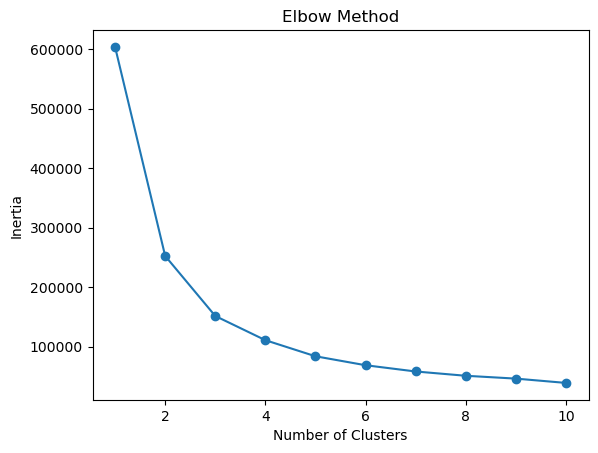

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
segmentation_features = data[['Total_Purchases', 'Total_Amount']].dropna()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(segmentation_features)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [23]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)


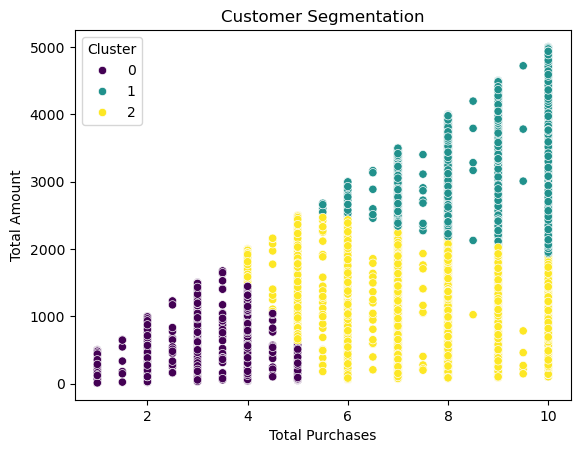

In [24]:
sns.scatterplot(x=data['Total_Purchases'], y=data['Total_Amount'], hue=data['Cluster'], palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Total Purchases')
plt.ylabel('Total Amount')
plt.show()


In [25]:
# Analyze cluster characteristics
cluster_summary = data.groupby('Cluster').agg({
    'Total_Purchases': ['mean', 'count', 'sum'],
    'Total_Amount': ['mean', 'sum'],
}).reset_index()

# Rename columns for clarity
cluster_summary.columns = ['Cluster',
                           'Avg_Purchases', 'Customer_Count', 'Total_Purchases',
                           'Avg_Amount', 'Total_Amount']

print("Cluster Summary:")
print(cluster_summary)


Cluster Summary:
   Cluster  Avg_Purchases  Customer_Count  Total_Purchases   Avg_Amount  \
0        0       2.541120          126300         320943.5   546.099626   
1        1       8.507910           62576         532391.0  3175.004375   
2        2       6.764771          113130         765298.5  1285.244486   

   Total_Amount  
0  6.897238e+07  
1  1.986791e+08  
2  1.453997e+08  


In [26]:
# Filter high-value customers (Cluster 2)
high_value_customers = data[data['Cluster'] == 2]

# Save this segment for marketing
high_value_customers.to_csv('high_value_customers.csv', index=False)

print(f"Number of High-Value Customers: {len(high_value_customers)}")


Number of High-Value Customers: 113130


In [27]:
# Filter low-value customers (Cluster 0)
low_value_customers = data[data['Cluster'] == 0]

# Save this segment for re-engagement
low_value_customers.to_csv('low_value_customers.csv', index=False)

print(f"Number of Low-Value Customers: {len(low_value_customers)}")


Number of Low-Value Customers: 126300


In [28]:
# Example: Analyzing product preferences by cluster
product_preferences = data.groupby(['Cluster', 'Product_Category']).size().unstack().fillna(0)

print("Product Preferences by Cluster:")
print(product_preferences)


Product Preferences by Cluster:
Product_Category  Books  Clothing  Electronics  Grocery  Home Decor
Cluster                                                            
0                 22908     22897        29921    27873       22701
1                 11242     11491        14819    13666       11358
2                 20472     20351        26739    25245       20323


Cluster Trends Over Time:
Cluster       0      1      2
Year                         
2023     105321  52317  94560
2024      20979  10259  18570


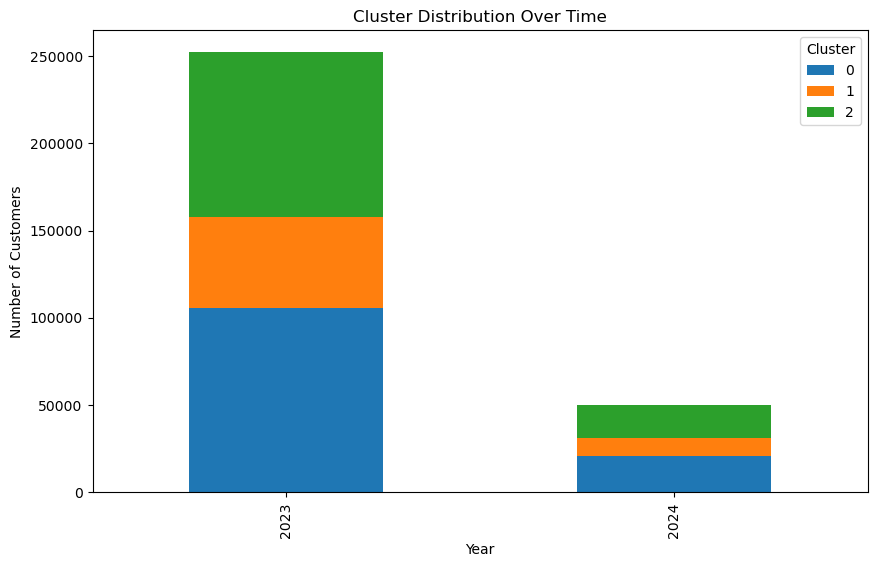

In [29]:
# Example: Track clusters over time (if you have a 'Year' column)
cluster_trends = data.groupby(['Year', 'Cluster']).size().unstack(fill_value=0)

print("Cluster Trends Over Time:")
print(cluster_trends)

# Visualize the trends
cluster_trends.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Cluster Distribution Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Customers")
plt.show()


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Use relevant features for prediction
features = data[['Total_Purchases', 'Total_Amount']]
target = data['Cluster']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 99.99%


In [31]:
# Example: New customer data for prediction
new_customer_data = pd.DataFrame({
    'Total_Purchases': [10, 25, 5],
    'Total_Amount': [1200, 4000, 500]
})

# Ensure only the same feature columns are used
# (Matching the columns used during model training)
predict_features = new_customer_data[['Total_Purchases', 'Total_Amount']]

# Predict the cluster
predicted_clusters = clf.predict(predict_features)

# Add predictions to the new data
new_customer_data['Predicted_Cluster'] = predicted_clusters
print(new_customer_data)


   Total_Purchases  Total_Amount  Predicted_Cluster
0               10          1200                  2
1               25          4000                  1
2                5           500                  0


In [32]:
import pickle

In [33]:
file_name = 'customer_segmentation_model.pkl'
pickle.dump(clf,open (file_name,'wb'))

In [34]:
loaded_model=pickle.load(open(file_name,'rb'))

In [35]:
input_data = pd.DataFrame({
    'Total_Purchases': [10, 25, 5],
    'Total_Amount': [1200, 4000, 500]
})

predictions = []  # To store predictions for each row
for index in input_data.index:
    row_data = input_data.loc[[index]]  # Get data for current row
    row_data_as_numpy_array = np.asarray(row_data)
    row_data_reshaped = row_data_as_numpy_array.reshape(1, -1)  # Reshape to (1, 2)
    prediction = loaded_model.predict(row_data_reshaped)
    predictions.append(prediction[0])  # Store prediction for current row

print(predictions)  # Print all predictions

for prediction in predictions:
    if prediction == 0:
        print('Low Value Customer')
    elif prediction == 1:
        print('Mid Value Customer')
    else:
        print('High Value Customer')

[2, 1, 0]
High Value Customer
Mid Value Customer
Low Value Customer


In [36]:
import joblib

# Save the trained clustering model
joblib.dump(clf, 'customer_segmentation_model.pkl')

print("Model saved successfully!")


Model saved successfully!


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1